# Homework 7

## Problem 3

We reverse the roles of training and validation sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# https://stackoverflow.com/questions/9777783/suppress-scientific-notation-in-numpy-when-creating-array-from-nested-list
np.set_printoptions(suppress=True)

## 3.1 Read data

In [2]:
data_in = np.loadtxt('in.dta.txt', dtype=np.float64)
print(data_in)
print(data_in.shape)

[[-0.77947021  0.83822138  1.        ]
 [ 0.15563491  0.89537743  1.        ]
 [-0.0599077  -0.71777995  1.        ]
 [ 0.20759636  0.75893338  1.        ]
 [-0.19598312 -0.37548716 -1.        ]
 [ 0.58848947 -0.84255381  1.        ]
 [ 0.00719859 -0.5483165  -1.        ]
 [ 0.73883852 -0.60339369  1.        ]
 [ 0.70464808 -0.02042005  1.        ]
 [ 0.96992666  0.6413712  -1.        ]
 [ 0.43543099  0.74477254 -1.        ]
 [-0.84425822  0.74235423  1.        ]
 [ 0.59142471 -0.54602118  1.        ]
 [-0.06909312  0.03766    -1.        ]
 [-0.95154865 -0.73305502 -1.        ]
 [-0.12988138  0.75676096  1.        ]
 [-0.49534647 -0.56627908 -1.        ]
 [-0.90399413  0.5092215   1.        ]
 [ 0.29235128  0.16089015 -1.        ]
 [ 0.64798552 -0.77933769  1.        ]
 [ 0.37595574  0.07820309 -1.        ]
 [ 0.24588993  0.00451467 -1.        ]
 [-0.45719155  0.42390461  1.        ]
 [-0.44127876  0.70571892  1.        ]
 [ 0.50744669  0.75872586 -1.        ]
 [-0.13258381 -0.58178837

## 3.2 Reverse the roles of training and validation set

This time we'll reverse the role of training and validation set by choosing the last $N_{train} = 10$ points as training set, and the first $N_{val} = 25$ points as validation set.

In [3]:
# Split the data into first 25 points as validation set,
# last 10 points as training set

validation = data_in[:25, :]
training = data_in[25:, :]


print("\nvalidation set")
print(validation)
print(validation.shape)
x1_val = validation[:,0]
x2_val = validation[:,1]
y_val = validation[:,2]
N_val = validation.shape[0]



print("\ntraining set")
print(training)
print(training.shape)
x1_train = training[ :, 0]
x2_train = training[:,1]
y_train = training[:,2]



validation set
[[-0.77947021  0.83822138  1.        ]
 [ 0.15563491  0.89537743  1.        ]
 [-0.0599077  -0.71777995  1.        ]
 [ 0.20759636  0.75893338  1.        ]
 [-0.19598312 -0.37548716 -1.        ]
 [ 0.58848947 -0.84255381  1.        ]
 [ 0.00719859 -0.5483165  -1.        ]
 [ 0.73883852 -0.60339369  1.        ]
 [ 0.70464808 -0.02042005  1.        ]
 [ 0.96992666  0.6413712  -1.        ]
 [ 0.43543099  0.74477254 -1.        ]
 [-0.84425822  0.74235423  1.        ]
 [ 0.59142471 -0.54602118  1.        ]
 [-0.06909312  0.03766    -1.        ]
 [-0.95154865 -0.73305502 -1.        ]
 [-0.12988138  0.75676096  1.        ]
 [-0.49534647 -0.56627908 -1.        ]
 [-0.90399413  0.5092215   1.        ]
 [ 0.29235128  0.16089015 -1.        ]
 [ 0.64798552 -0.77933769  1.        ]
 [ 0.37595574  0.07820309 -1.        ]
 [ 0.24588993  0.00451467 -1.        ]
 [-0.45719155  0.42390461  1.        ]
 [-0.44127876  0.70571892  1.        ]
 [ 0.50744669  0.75872586 -1.        ]]
(25, 3)


## 3.3 Training

- Train on the 10 examples using linear regression.
- Perform linear regression on vectors of the form $(z_0, z_1, ..., z_k)$ for $k = 3, 4, ..., 7$.
- Use the validation set of 25 examples to select the model with the smallest classification error.

### 3.3.1 Implement linear regression

In [4]:
# train on the 10 examples using linear regression
# perform linear regression on vectors of the form (z0, z1, ..., zk) for k = 3, 4, ..., 7
# use the validation set of 25 examples to select the model with the smallest classification error


def get_feature_matrix_Z_k(x1, x2, k):
    '''
    - Takes vectors x1 and x2
    - builds new feature matrix Z in the transformed space,
    with up to 8 features z0, z1, ..., z7
    - parameter k determines model:
    - returns feature matrix using columns z0, z1, ..., zk
    '''
    N = x1.shape[0]
    Z = np.array([np.ones(N), x1, x2,
                  x1**2, x2**2, x1*x2,
                  np.absolute(x1-x2), np.absolute(x1+x2)]).T
    
    # Using only columns 0, 1, ... , k
    return Z[:, :(k+1)]
    
#-----------------------------------------------------------
    
def linear_regression(x1, x2, y, k):
    '''
    - Takes vector x1, vector x2, vector y
    - parameter k
    - returns weight vector for linear regression
      using vectors of the form (z0, z1, ..., zk)
    '''
    
    # feature matrix Z_k
    N = x1.shape[0]
    Z_k = get_feature_matrix_Z_k(x1, x2, k)
    
    
    # see lecture 3, slide 17
    Z_dagger = np.dot(np.linalg.inv(np.dot(Z_k.T, Z_k)), Z_k.T)

    # Use linear regression to get weight vector
    w_tilde = np.dot(Z_dagger, y)
    #print("k=", k, "    w_tilde=", w_tilde)
    
    return w_tilde

### 3.3.2 Compute weight vectors $\tilde{w}$ via linear regression

In [5]:
# perform linear regression for k = 3, ..., 7

w_tildes = 8 * [None]
for k in range(1, 8):
    w_tildes[k] = linear_regression(x1_train, x2_train, y_train, k)


print(*w_tildes, sep='\n')

None
[ 0.23860154 -0.18325609]
[ 0.22059282 -0.14596202  0.11873086]
[-0.06349955 -0.38323742 -0.09675508  0.84735086]
[-0.42861161 -0.23039814 -0.42115309  0.79344739  1.30339647]
[ 0.06218029  0.97043641  0.79913207 -0.81792682 -0.3385473  -3.08785451]
[-1.0277635   0.25805284  1.07176901 -2.76488722 -3.47974508  1.58579189
  4.29253717]
[-0.80700076  0.32352778  1.11378194 -2.56863856 -3.15759589  2.27079285
  4.28271936 -0.59066349]


### 3.3.3 Examine $k=3$

Let's look at the weight vector for $k=3$ and the feature matrix $Z_3$

In [6]:
k = 3
print(w_tildes[k])
Z_k_val = get_feature_matrix_Z_k(x1_val, x2_val, k)
print(Z_k_val)

[-0.06349955 -0.38323742 -0.09675508  0.84735086]
[[ 1.         -0.77947021  0.83822138  0.60757381]
 [ 1.          0.15563491  0.89537743  0.02422223]
 [ 1.         -0.0599077  -0.71777995  0.00358893]
 [ 1.          0.20759636  0.75893338  0.04309625]
 [ 1.         -0.19598312 -0.37548716  0.03840938]
 [ 1.          0.58848947 -0.84255381  0.34631986]
 [ 1.          0.00719859 -0.5483165   0.00005182]
 [ 1.          0.73883852 -0.60339369  0.54588236]
 [ 1.          0.70464808 -0.02042005  0.49652892]
 [ 1.          0.96992666  0.6413712   0.94075773]
 [ 1.          0.43543099  0.74477254  0.18960015]
 [ 1.         -0.84425822  0.74235423  0.71277194]
 [ 1.          0.59142471 -0.54602118  0.34978319]
 [ 1.         -0.06909312  0.03766     0.00477386]
 [ 1.         -0.95154865 -0.73305502  0.90544483]
 [ 1.         -0.12988138  0.75676096  0.01686917]
 [ 1.         -0.49534647 -0.56627908  0.24536813]
 [ 1.         -0.90399413  0.5092215   0.81720539]
 [ 1.          0.29235128  0.160

## 3.4 Predict the classification

The function below implements the classification of a point for a given weight vector.

In [7]:
def predict(x1_test, x2_test, w_tilde_k):
    '''
    - Takes vectors x1_test, x2_test corresponding 
    to unseen points (x1_test, x2_test)
    - Takes hypothesis / model w_tilde_k
    - Returns predictions for these points using
    the hypothesis w_tilde_k
    '''
    
    k = w_tilde_k.shape[0] - 1     # length of w = k + 1
    Z_k_test = get_feature_matrix_Z_k(x1_test, x2_test, k)
    return np.sign(np.dot(Z_k_test, w_tilde_k))

### 3.4.1 Compute the classification errors

The classification errors are computed using the validation set.

In [8]:
errors_val = 8 * [None]
predictions_k_val = 8 * [None]

for k in range(1, 8):
    errors_val[k] = sum(y_val != predict(x1_val, x2_val, w_tildes[k])) / N_val
    predictions_k_val[k] = predict(x1_val, x2_val, w_tildes[k])
    
#print(*errors_val, sep='\n')

for k in range(1, 8):
    print("k=", k, "    => E_val =", errors_val[k])

k= 1     => E_val = 0.44
k= 2     => E_val = 0.44
k= 3     => E_val = 0.28
k= 4     => E_val = 0.36
k= 5     => E_val = 0.2
k= 6     => E_val = 0.08
k= 7     => E_val = 0.12


### 3.4.2 Visualize validation set

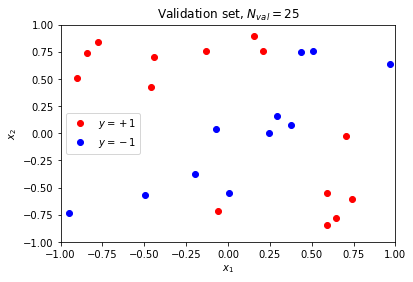

In [9]:
# plot points in validation set
plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro', label='$y=+1$')
plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo', label='$y=-1$')

title_string = "Validation set, $N_{val} = 25$"
plt.title(title_string)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

### 3.4.3 Visualize classification of validation set by different models $k$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


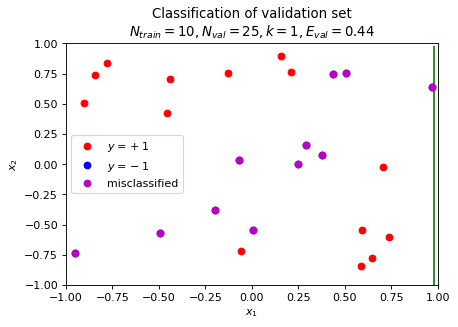

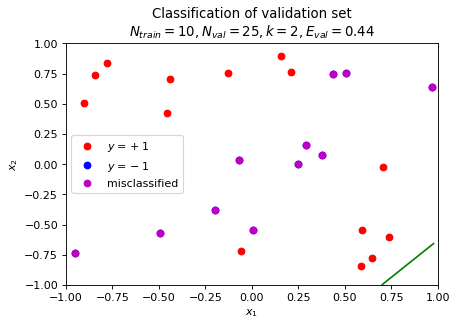

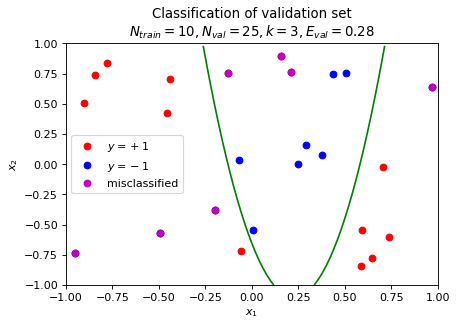

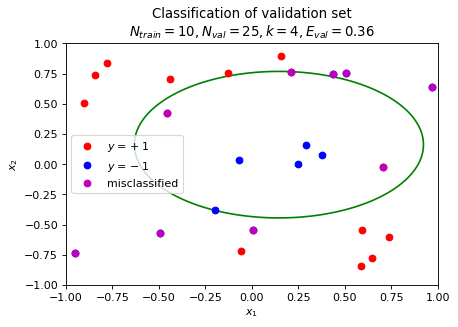

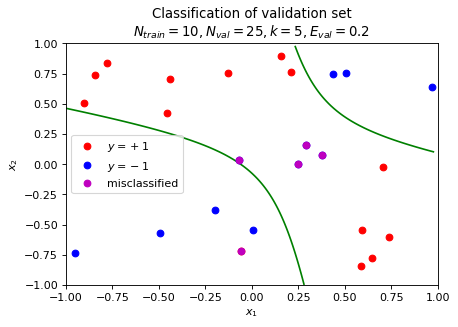

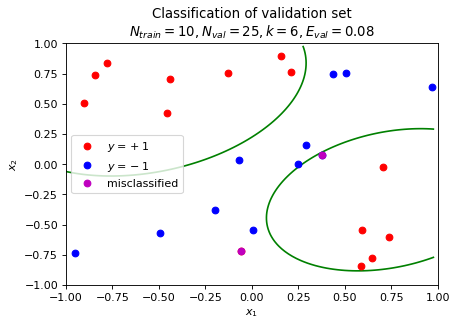

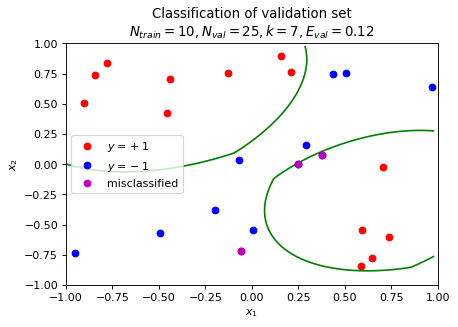

In [10]:
u = np.arange(-1.0,1.0,0.02)
X,Y= np.meshgrid(u,u)


# view validation test set
for k in range(1, 8):
    

    fig = plt.figure(k, dpi = 80)
    #plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro')
    #plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo')
    
    # plot points
    plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro', label='$y=+1$')
    plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo', label='$y=-1$')
    
    # plot correctly classified as blue and misclassified as red
    misclassified = (y_val != predictions_k_val[k])
    plt.plot(x1_val[misclassified], x2_val[misclassified], 'mo', label='misclassified')
    
    
    
    #print(w_tildes[k])
    w = list(w_tildes[k]) + (8-k-1) * [0]
    #print(w)

    boundary = lambda x1, x2, w: w[0]*1 + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2 + w[5]*x1*x2 +w[6]* np.absolute(x1-x2) +w[7]* np.absolute(x1+x2)
    phi = boundary(X,Y, w)
    plt.contour(X,Y,phi, [0.0], colors = 'g')

    
    title_string = "Classification of validation set\n$N_{train}=10, N_{val}=25," + " k={0}, $".format(str(k))
    title_string += ("$E_{val}=$" + str(errors_val[k]))
    plt.title(title_string)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

## 3.5 Result for problem 3

The error $E_{val}=0.08$ is smallest for $k = 6$, thus the correct answer is **3[d]**.

# Problem 4

# Test set

Compute the out-of-sample classification error using `out.dta.txt` as test set


### 4.1 Read file `out.dta.txt` for test set

In [11]:
data_out = np.loadtxt('out.dta.txt', dtype=np.float64)
df_out = pd.DataFrame(data_out, columns=['x1', 'x2','y'])
print(df_out.head(5))
print(data_out.shape)

x1_test = data_out[:,0]
x2_test = data_out[:,1]
y_test = data_out[:,2]

N_test = data_out.shape[0]

         x1        x2    y
0 -0.106006 -0.081467 -1.0
1  0.177930 -0.345951 -1.0
2  0.102162  0.718258  1.0
3  0.694078  0.623397 -1.0
4  0.023541  0.727432  1.0
(250, 3)


## 4.2 Compute error on 'out.dta.txt'

In [12]:
errors_test = 8 * [None]
predictions_k_test = 8 * [None]

for k in range(1, 8):
    errors_test[k] = sum(y_test != predict(x1_test, x2_test, w_tildes[k])) / N_test
    predictions_k_test[k] = predict(x1_test, x2_test, w_tildes[k])
    
for k in range(1, 8):
    print("k=", k, "    => E_out =", errors_test[k])

k= 1     => E_out = 0.472
k= 2     => E_out = 0.5
k= 3     => E_out = 0.396
k= 4     => E_out = 0.388
k= 5     => E_out = 0.284
k= 6     => E_out = 0.192
k= 7     => E_out = 0.196


### 4.3 Visualize test set

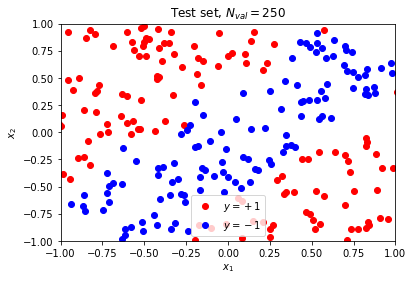

In [13]:
# plot points in test set
plt.plot(x1_test[y_test==1], x2_test[y_test==1], 'ro', label='$y=+1$')
plt.plot(x1_test[y_test==-1], x2_test[y_test==-1], 'bo', label='$y=-1$')

title_string = "Test set, $N_{val} = 250$"
plt.title(title_string)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

## 4.4 Visualize classification of test set by different models $k$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


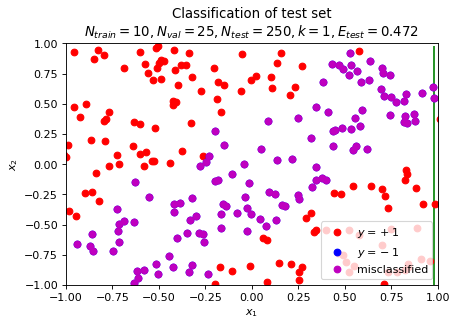

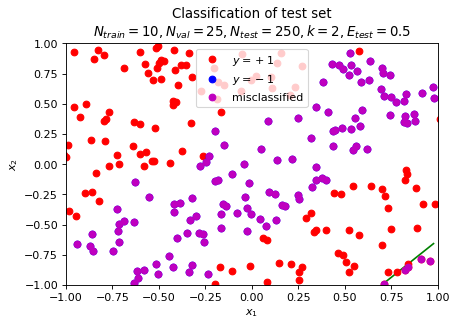

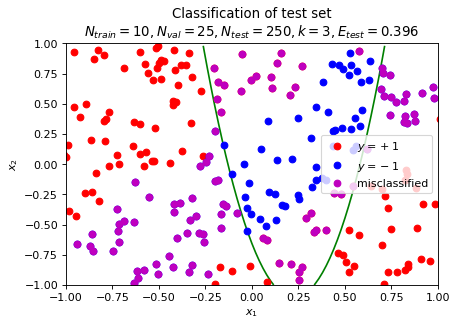

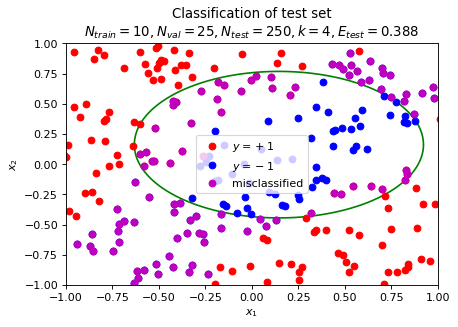

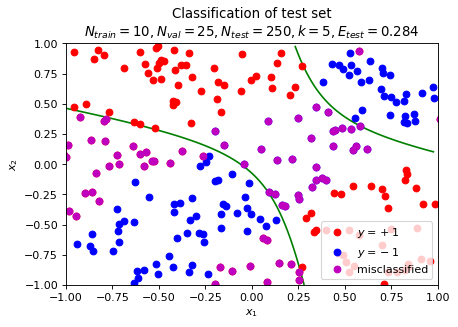

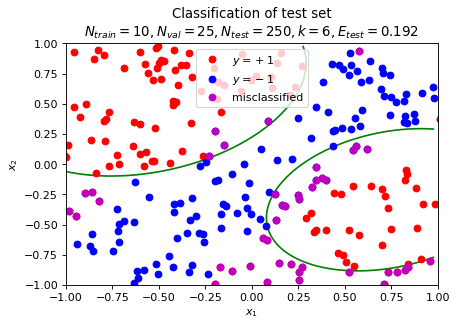

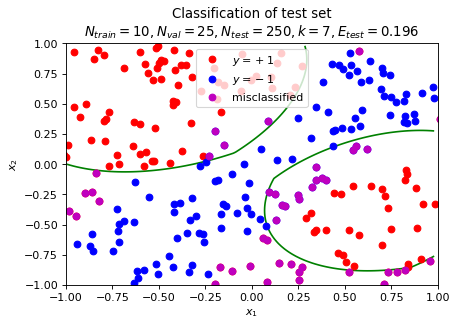

In [14]:

# use 'out.dta.txt' as test set
for k in range(1, 8):
    

    fig = plt.figure(k, dpi = 80)
    #plt.plot(x1_val[y_val==1], x2_val[y_val==1], 'ro')
    #plt.plot(x1_val[y_val==-1], x2_val[y_val==-1], 'bo')
    
    # plot points
    plt.plot(x1_test[y_test==1], x2_test[y_test==1], 'ro', label='$y=+1$')
    plt.plot(x1_test[y_test==-1], x2_test[y_test==-1], 'bo', label='$y=-1$')
    
    # plot correctly classified as blue and misclassified as red
    misclassified = (y_test != predictions_k_test[k])
    plt.plot(x1_test[misclassified], x2_test[misclassified], 'mo', label='misclassified')
    
    
    
    #print(w_tildes[k])
    w = list(w_tildes[k]) + (8-k-1) * [0]
    #print(w)

    boundary = lambda x1, x2, w: w[0]*1 + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2 + w[5]*x1*x2 +w[6]* np.absolute(x1-x2) +w[7]* np.absolute(x1+x2)
    phi = boundary(X,Y, w)
    plt.contour(X,Y,phi, [0.0], colors = 'g')

    
    title_string = "Classification of test set\n$N_{train}=10, N_{val}=25, N_{test}=250," + " k={0}, $".format(str(k))
    title_string += ("$E_{test}=$" + str(errors_test[k]))
    plt.title(title_string)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

## 4.5 Result for problem 4

Using the file 'out.dta.txt' as test set the minimum out-of-sample error is $E_{test} = 0.104$ for $k=6$. Thus the correct answer is **4[d]**.

## Discussion

If we were to choose a model using the validation error, then we would choose the model for $k=6$ with the smallest validation error $E_{val} = 0.0$.

This time, on the test set of size $N_{test}=250$ the chosen model for $k=6$ also achieves the smallest error $E_{test}=0.104$.

# Problem 5

We read the data 'in.dta.txt' of 35 points and split it into two sets of size $N_{train}$ and $N_{val}$. After training on the $N_{train}$ samples we computed the classification error on the $N_{val}$ validation points to choose our model. Finally, we measured the classification error on the $N_{test}=250$ points form the file 'out.dta.txt'.

- $N_{train}=25$ and $N_{val}=10$. Here, we choose the model for $k=6$ because it has the smallest validation error $E_{val}=0.0$. The out-of-sample test error for $k=6$ is $E_{test} = 0.084$.


- $N_{val}=25$ and $N_{train}=10$. Here, we choose the model for $k=6$ because it has the smallest validation error
$E_{val}=0.08$. The out-of-sample test error for $k=6$ is $E_{test} = 0.192$.


Now, our tuple is $(E_\text{out}^\text{Problem 1}, E_\text{out}^\text{Problem 3}) = (0.084, 0.192)$, and we have to determine which of the given choices has the smallest Euclidian distance to our tuple.

In [15]:
choices = [(0.0, 0.1), (0.1, 0.2), (0.1, 0.3), (0.2, 0.2), (0.2, 0.3)]

computed_values = (0.084, 0.192)

min_distance = 2**64
pick_choice = None

print("Our computed values are (E_out_1, E_out_2) = ", computed_values, "\n")

for choice in choices:
    distance = np.linalg.norm(np.array(choice) - np.array(computed_values))
    if distance < min_distance:
        min_distance = distance
        pick_choice = choice
    print("choice=", choice, "\tEuclidian distance:", distance)

    
print("\nWe pick:", pick_choice)

Our computed values are (E_out_1, E_out_2) =  (0.084, 0.192) 

choice= (0.0, 0.1) 	Euclidian distance: 0.124579292019
choice= (0.1, 0.2) 	Euclidian distance: 0.01788854382
choice= (0.1, 0.3) 	Euclidian distance: 0.109178752512
choice= (0.2, 0.2) 	Euclidian distance: 0.11627553483
choice= (0.2, 0.3) 	Euclidian distance: 0.158492902049

We pick: (0.1, 0.2)


$(0.1, 0.2)$ has the smallest Euclidian distance to our computed values $(0.084, 0.192)$ . Therefore, choice **5[b]** is the correct answer.

# Discussion

We trained a better classifier using the first 25 points as training and the last 10 points as validation set with an error of $E_{out} = 0.084$, as opposed to using the first 25 points as validation set and the last 10 points as training set with an error of $E_{out}=0.192$.